## DONE: Finish the design of `show_bar_chart` and `main`

For `main`, all that's left is an additional test case.

In [1]:
from cs103 import *
import csv
from typing import List
from typing import NamedTuple
import matplotlib.pyplot as plt
from enum import Enum


LetterGrade = Enum('LetterGrade', ['F', 'D', 'C_minus', 'C', 'C_plus', 'B_minus', 'B', 'B_plus', 'A_minus', 'A', 'A_plus'])
# interp. a letter grade at UBC
# examples are redundant for enumeration

# template based on enumeration (11 cases)
@typecheck
def fn_for_letter_grade(lg: LetterGrade) -> ...:
    if lg == LetterGrade.A_plus:
        return ...
    elif lg == LetterGrade.A:
        return ...
    elif lg == LetterGrade.A_minus:
        return ...
    elif lg == LetterGrade.B_plus:
        return ...
    elif lg == LetterGrade.B:
        return ...
    elif lg == LetterGrade.B_minus:
        return ...
    elif lg == LetterGrade.C_plus:
        return ...
    elif lg == LetterGrade.C:
        return ...
    elif lg == LetterGrade.C_minus:
        return ...
    elif lg == LetterGrade.D:
        return ...
    elif lg == LetterGrade.F:
        return ...


GradeData = NamedTuple('Grade', [('letter_grade', LetterGrade), 
                                 ('num_students', int)]) # in range [0, ...)
# interp. the number of students who received a particular LetterGrade
GD_F = GradeData(LetterGrade.F, 120)
GD_D = GradeData(LetterGrade.D, 100)

# template based on compound (2 fields) and reference rule
@typecheck
def fn_for_grade_data(gd: GradeData) -> ...:
    return ...(fn_for_letter_grade(gd.letter_grade),
               gd.num_students)

# List[GradeData]
# interp. a list of grade data

L0 = []
L1 = [GD_F, GD_D]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_logd(logd: List[GradeData]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for gd in logd:
        acc = ...(acc,fn_for_grade_data(gd))
    return acc
            

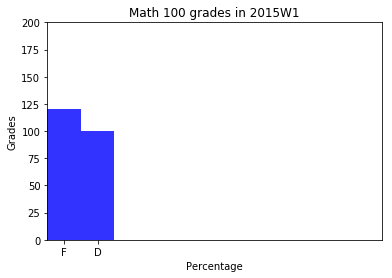

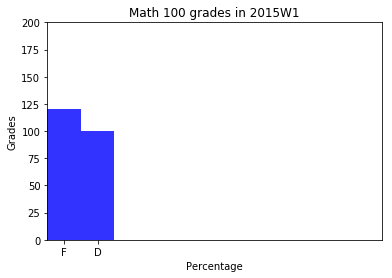

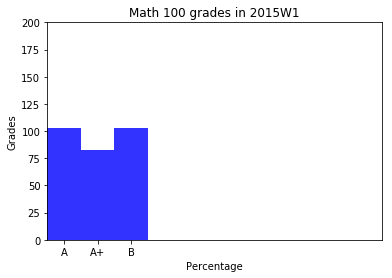

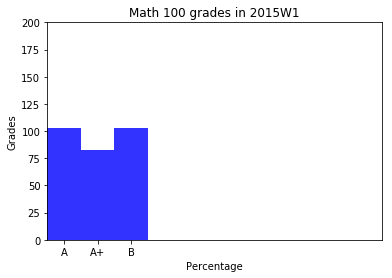

35 of 35 tests passed


In [2]:
### FUNCTIONS
#
# We're asking you to add a test case to main, read, and show_bar_chart and then to complete
# show_bar_chart.

@typecheck
def main(filename: str) -> None:
    """
    Reads the grade data from given filename and displays them in a bar chart
    """
    # Template from HtDAP, based on composition
    return show_bar_chart(read(filename))

@typecheck
def show_bar_chart(logd: List[GradeData]) -> None:
    """
    shows a bar chart of the grades and number of students in logd
    """
    # return None #stub
    # Template from visualization
    math_grades = get_num_students(logd)

    bar_width = 10

    # the x-coord for the middle of each of the bars for the bar chart
    middle_of_bars = produce_num_sequence(logd, 5, 10)

    # the opacity for the bars. It must be between 0 and 1, 
    # and higher numbers are more opaque (darker)
    opacity = 0.8

    # create the first bar chart
    rects1 = plt.bar(middle_of_bars, 
                     math_grades,                   
                     bar_width,
                     alpha=opacity,                 
                     color='b')                     

    # set the labels for the x-axis, y-axis, and plot title
    plt.xlabel('Percentage')
    plt.ylabel('Grades')
    plt.title('Math 100 grades in 2015W1')

    # set the range for the axes
    # [x-min, x-max, y-min, y-max]
    plt.axis([0,100,0,200])

    # set the x-coordinate for positioning the labels. Here, we want 
    # each label to be in the middle of each bar
    x_coord_labels = produce_num_sequence(logd, 5, 10)

    # set the labels for each 'tick' on the x-axis
    tick_labels = get_grade_labels(logd)

    plt.xticks(x_coord_labels, tick_labels)

    # show the plot
    plt.show()


# ADAPTED from the bar chart worked example.
@typecheck
def produce_num_sequence(values: List[GradeData], initial: float, gap: float) -> List[float]:
    """
    Produce a list of numbers like [initial, initial + gap, initial + 2*gap, ...] of the same
    length as values, e.g., to give alignment coordinates for a plot. The number
    of numbers in the list is equal to len(values). The first value is initial. The gap between values
    is gap.
    
    E.g., [5,15,25,35,45,55,65,75] for 8 values, initial == 5, and gap == 10.
    """
    #return []  #stub
    # Template from List[GradeData] with two additional parameters
    
    # nums is the numbers for the values seen so far
    nums = []  # type: List[int]
    
    # next_num is the next number to use
    next_num = initial
    
    for val in values:
        nums.append(next_num)
        next_num = next_num + gap
    
    return nums   

    
@typecheck
def read(filename: str) -> List[GradeData]:
    """    
    reads information from the specified file and returns a list of grade data
    """
    # return []  #stub
    # Template from HtDAP
    # logd contains the result so far
    logd = [] # type: List[GradeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            gd = GradeData(parse_grade(row[0]), parse_int(row[1])) 
            logd.append(gd)
    
    return logd

@typecheck
def parse_grade(s: str) -> LetterGrade:
    """
    produces the LetterGrade corresponding to its string representation s
    (e.g., LetterGrade.A_plus for "A+")

    Assumes that s is a legitimate letter grade string, one of: A+, A,
    A-, B+, B, B-, C+, C, C-, D, and F.
    """
    #return LetterGrade.A_plus  #stub
    #template from atomic distinct, but took inspiration from LetterGrade template
    if s == "A+":
        return LetterGrade.A_plus
    elif s == "A":
         return LetterGrade.A
    elif s == "A-":
         return LetterGrade.A_minus
    elif s == "B+":
         return LetterGrade.B_plus
    elif s == "B":
         return LetterGrade.B
    elif s == "B-":
         return LetterGrade.B_minus
    elif s == "C+":
         return LetterGrade.C_plus
    elif s == "C":
         return LetterGrade.C
    elif s == "C-":
         return LetterGrade.C_minus
    elif s == "D":
         return LetterGrade.D
    elif s == "F":
         return LetterGrade.F


@typecheck
def get_grade_label(lg: LetterGrade) -> str:
    """
    return the label for lg
    """
    #return "" #stub
    # template from LetterGrade
    if lg == LetterGrade.A_plus:
        return "A+"
    elif lg == LetterGrade.A:
        return "A"
    elif lg == LetterGrade.A_minus:
        return "A-"
    elif lg == LetterGrade.B_plus:
        return "B+"
    elif lg == LetterGrade.B:
        return "B"
    elif lg == LetterGrade.B_minus:
        return "B-"
    elif lg == LetterGrade.C_plus:
        return "C+"
    elif lg == LetterGrade.C:
        return "C"
    elif lg == LetterGrade.C_minus:
        return "C-"
    elif lg == LetterGrade.D:
        return "D"
    elif lg == LetterGrade.F:
        return "F"

@typecheck
def get_grade_labels(logd: List[GradeData]) -> List[str]:
    """
    return a list of labels from logdmr
    """
    # return [] #stub
    # template from List[GradeData]
    # list_of_labels contains the result so far
    list_of_labels = [] # type: List[str]
    for gd in logd:
        list_of_labels.append(get_grade_label(gd.letter_grade))
    return list_of_labels

@typecheck
def get_num_students(logd: List[GradeData]) -> List[int]:
    """
    return a list of the number of students in each GradeData in logc
    """
    # return [] #stub
    # template from List[GradeData]
    # list_of_num_students contains the result so far
    list_of_num_students = [] # type: List[int]
    for gd in logd:
        list_of_num_students.append(gd.num_students)
    return list_of_num_students




    
    
# Begin testing
start_testing()

# First test for main and show_bar_chart. For expected result, see just below:
expect(main("math_100_grades_2015W_test1.csv"), None)
expect(show_bar_chart([GradeData(LetterGrade.F, 120), GradeData(LetterGrade.D, 100)]), None)

# Both of these should produce something like:

#   # people earning the grade
#
#     |                                                                       
#     |   *                                                                       
#     |   *                                                                       
# 100 |   *            *                                                          
#     |   *            *                                                          
#     |   *            *                                                          
#     |   *            *                                                          
#     |   *            *                                                          
#  50 |   *            *                                                          
#     |   *            *                                                          
#     |   *            *                                                          
#     |   *            *                                                          
#     |   *            *                                                          
#     +----------------------------->  grades
#
#         F            D

# Second test for main and show_bar_chart. For expected result, see just below:
expect(main("math_100_grades_2015W_test2.csv"), None)
expect(show_bar_chart([GradeData(LetterGrade.A, 103), GradeData(LetterGrade.A_plus, 83), 
                       GradeData(LetterGrade.B, 103)]), None)

# Both of these should produce something like:

#   # people earning the grade
#
#     |                                                                       
#     |                                                                          
#     |                                                                          
# 100 |   *         *                                                          
#     |   *         *                                                          
#     |   *    *    *                                                          
#     |   *    *    *                                                          
#     |   *    *    *                                                          
#  50 |   *    *    *                                                          
#     |   *    *    *                                                          
#     |   *    *    *                                                          
#     |   *    *    *                                                          
#     |   *    *    *                                                          
#     +----------------------------->  grades
#
#         A    A+   B


# Examples and tests for produce_num_sequence
expect(produce_num_sequence([], 5, 10), [])
expect(produce_num_sequence([GD_D, GD_D, GD_D], 5, 10), [5, 15, 25])
expect(produce_num_sequence([GD_D, GD_D, GD_D], 0.5, 3.5), [0.5, 4.0, 7.5])


# Examples and tests for read
expect(read("math_100_grades_2015W_test1.csv"),
      [GradeData(LetterGrade.F, 120), GradeData(LetterGrade.D, 100)])
expect(read("math_100_grades_2015W_test2.csv"),
      [GradeData(LetterGrade.A, 103), GradeData(LetterGrade.A_plus, 83), 
       GradeData(LetterGrade.B, 103)])

# No expects for show_bar_chart, but it's extremely valuable to write examples by hand on paper

expect(parse_grade("A+"), LetterGrade.A_plus) 
expect(parse_grade("A"), LetterGrade.A) 
expect(parse_grade("A-"), LetterGrade.A_minus) 
expect(parse_grade("B+"), LetterGrade.B_plus) 
expect(parse_grade("B"), LetterGrade.B) 
expect(parse_grade("B-"), LetterGrade.B_minus) 
expect(parse_grade("C+"), LetterGrade.C_plus) 
expect(parse_grade("C"), LetterGrade.C) 
expect(parse_grade("C-"), LetterGrade.C_minus) 
expect(parse_grade("D"), LetterGrade.D)
expect(parse_grade("F"), LetterGrade.F)

expect(get_grade_label(LetterGrade.A_plus), "A+")
expect(get_grade_label(LetterGrade.A), "A")
expect(get_grade_label(LetterGrade.A_minus), "A-")
expect(get_grade_label(LetterGrade.B_plus), "B+")
expect(get_grade_label(LetterGrade.B), "B")
expect(get_grade_label(LetterGrade.B_minus), "B-")
expect(get_grade_label(LetterGrade.C_plus), "C+")
expect(get_grade_label(LetterGrade.C), "C")
expect(get_grade_label(LetterGrade.C_minus), "C-")
expect(get_grade_label(LetterGrade.D), "D")
expect(get_grade_label(LetterGrade.F), "F")


expect(get_grade_labels([]), [])
expect(get_grade_labels([GradeData(LetterGrade.F, 120), GradeData(LetterGrade.D, 100)]), 
       ["F", "D"])

expect(get_num_students([]), [])
expect(get_num_students([GradeData(LetterGrade.F, 120), GradeData(LetterGrade.D, 100)]), 
       [120, 100])

# show testing summary
summary()
      

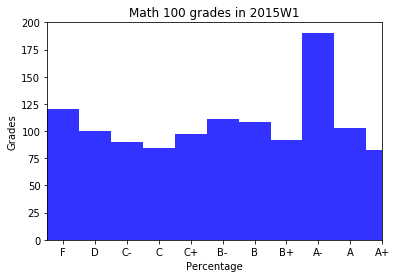

In [3]:
# Now, let's look at the information we wanted to analyze from the start!                        
main("math_100_grades_2015W.csv")